# Chapter 3: Trends

In [1]:
%matplotlib inline

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import pandas as pd
import numpy as np

import os

PROJECT_PATH = os.path.join('/', 'Users', 'jcaracotsios', 'Projects', 'Textbooks', 'Time-Series-Analysis')

# Load datasets
milk = pd.read_csv(os.path.join(PROJECT_PATH, 'data', 'monthly-milk-production-pounds.csv'), skip_footer=2)
dubuque = pd.read_csv(os.path.join(PROJECT_PATH, 'data', 'average-monthly-temperatures.csv'), skip_footer=2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: The 'skip_f

## Clean and Explore Data

In [2]:
# Rename the columns in our dataset
milk.columns = ['Month', 'Production']
dubuque.columns = ['Month', 'Temperature']

In [3]:
# Cast Month as datetime
milk['Month'] = pd.to_datetime(milk['Month'], format='%Y-%m')
dubuque['Month'] = pd.to_datetime(dubuque['Month'], format='%Y-%m')

In [4]:
# Examine the milk production data
milk.head()

,Month,Production
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


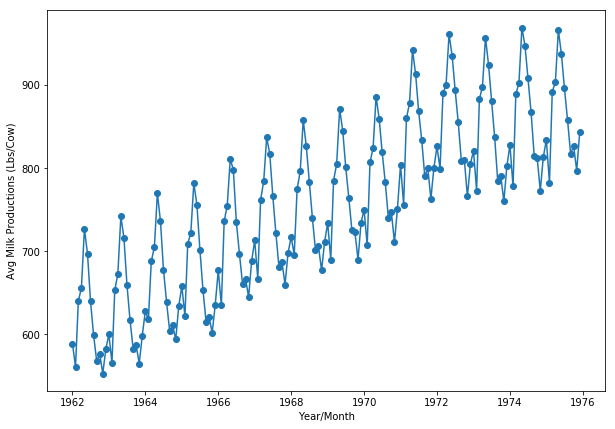

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(milk['Month'], milk['Production'], 'o-')
plt.xlabel('Year/Month')
plt.ylabel('Avg Milk Productions (Lbs/Cow)')

In [6]:
# Examine the Dubuque temperature data
dubuque.head()

,Month,Temperature
0,1964-01-01,24.7
1,1964-02-01,25.7
2,1964-03-01,30.6
3,1964-04-01,47.5
4,1964-05-01,62.9


(0, 80)

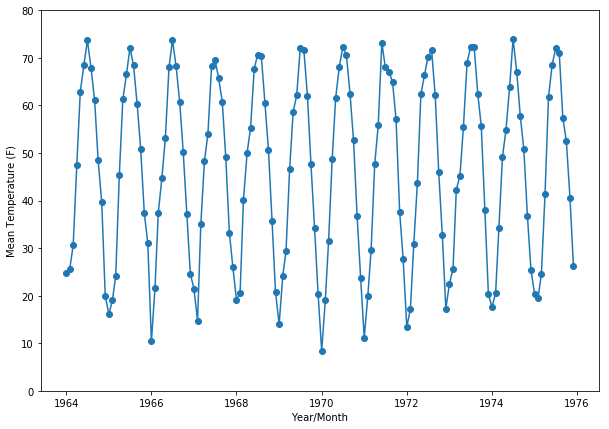

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(dubuque['Month'], dubuque['Temperature'], 'o-')
plt.xlabel('Year/Month')
plt.ylabel('Mean Temperature (F)')
plt.ylim(0, 80)

## Examples

### Exhibit 3.1: Time Trend Estimation for Milk Production Series

In [8]:
from statsmodels.regression.linear_model import OLS

In [9]:
# Prepare data for modeling
X = sm.add_constant(list(range(milk.shape[0])), prepend=True)
y = milk['Production']

In [10]:
# Instantiate an OLS model
model = OLS(exog=X, endog=y)

In [11]:
# Fit the model
results = model.fit()

We get results that are nearly identical to those in the book.

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     306.8
Date:                Sun, 04 Feb 2018   Prob (F-statistic):           1.42e-39
Time:                        12:11:18   Log-Likelihood:                -927.29
No. Observations:                 168   AIC:                             1859.
Df Residuals:                     166   BIC:                             1865.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        613.3750      9.331     65.737      0.000     594.953     631.797
x1             1.6926      0.097     17.516      0.000       1.502       1.883
==============================================================================
Omnibus:                       25.573   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.770
Skew:                           0.405   Prob(JB):                      0.00459
Kurtosis:                       2.060   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot Predictions

In [13]:
predictions = results.predict()

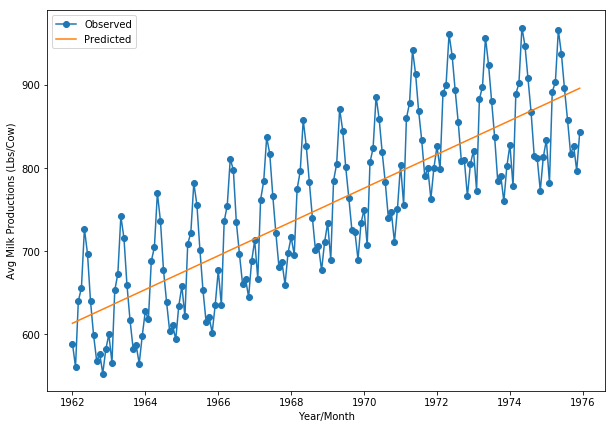

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(milk['Month'], milk['Production'], 'o-', label='Observed')
plt.plot(milk['Month'], predictions, '-', label='Predicted')
plt.xlabel('Year/Month')
plt.ylabel('Avg Milk Productions (Lbs/Cow)')
plt.legend()

### Exhibit 3.4: Linear Trend and Seasonal Means Estimates for Milk Production Series

We will fit a linear model with no intercept and seasonal means for the milk production series.

In [15]:
# Prepare data for modeling
y = milk['Production']

# Prepare exogenous data with monthly dummies
X = pd.get_dummies(milk['Month'].apply(lambda x: str(x).split('-')[1]))
X.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
X['Time'] = list(range(milk.shape[0]))

X = X[['Time', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [16]:
model = OLS(exog=X, endog=y).fit()

The output below matches Exhibit 3.4 almost exactly.

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     544.9
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          4.55e-120
Time:                        12:11:18   Log-Likelihood:                -698.90
No. Observations:                 168   AIC:                             1424.
Df Residuals:                     155   BIC:                             1464.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Time           1.7278      0.026     67.107      0.000       1.677       1.779
Jan          592.3060      4.759    124.464      0.000     582.905     601.707
Feb          552.7925      4.770    115.895      0.000     543.370     562.215
Mar          645.2790      4.781    134.973      0.000     635.835     654.723
Apr          660.1227      4.792    137.756      0.000     650.657     669.589
May          721.1092      4.803    150.131      0.000     711.621     730.597
Jun          692.7386      4.815    143.883      0.000     683.228     702.249
Jul          642.9394      4.826    133.222      0.000     633.406     652.473
Aug          600.6402      4.838    124.159      0.000     591.084     610.196
Sep          558.0553      4.849    115.078      0.000     548.476     567.635
Oct          561.5418      4.861    115.516      0.000     551.939     571.145
Nov          530.5283      4.873    108.869      0.000     520.902     540.155
Dec          567.2291      4.885    116.114      0.000     557.579     576.879
==============================================================================
Omnibus:                        3.002   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.739
Skew:                           0.311   Prob(JB):                        0.254
Kurtosis:                       3.062   Cond. No.                         668.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Plot Predictions

In [18]:
predictions = results.predict()

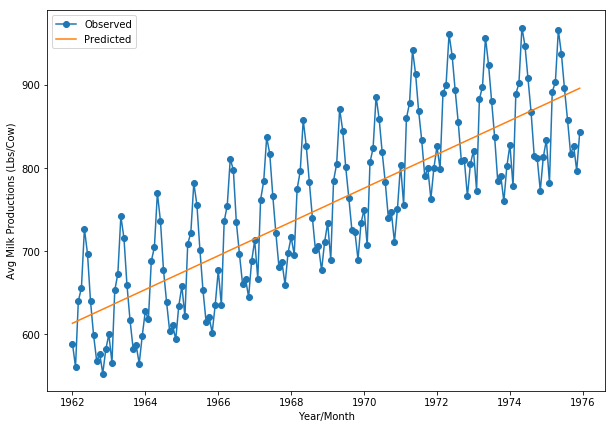

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(milk['Month'], milk['Production'], 'o-', label='Observed')
plt.plot(milk['Month'], predictions, '-', label='Predicted')
plt.xlabel('Year/Month')
plt.ylabel('Avg Milk Productions (Lbs/Cow)')
plt.legend()

If we want to get an ANOVA table, we need to ues the statsmodels formula API. 

In [20]:
from statsmodels.formula.api import ols

In [21]:
# Prepare a DataFrame
data = pd.DataFrame()
data['Month'] = dubuque['Month'].apply(lambda x: str(x).split('-')[1])
data['Time'] = X['Time']
data['Production'] = y

In [22]:
model = ols('Production ~ Time + C(Month)', data=data).fit()

Now, we can use the anova_lm() function to generate an ANOVA table.

In [23]:
from statsmodels.stats.anova import anova_lm
anova_lm(model)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(Month),11.0,451014.972222,41001.361111,254.038428,1.236026e-82
Time,1.0,877115.160839,877115.160839,5434.477068,1.579182e-108
Residual,131.0,21143.172494,161.398263,NaN,NaN


### Exhibit 3.6: Residual Time Plot for Temperature Series with Seasonal Means Model

The next few examples will use the seasonal means model for the monthly average temperatures in Dubuque, Iowa.

In [24]:
# Prepare data for modeling
X = pd.get_dummies(dubuque['Month'].apply(lambda x: str(x).split('-')[1]), drop_first=False)
X.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
y = dubuque['Temperature']

In [25]:
# Fit a seasonal means model
model = sm.OLS(endog=y, exog=X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     405.1
Date:                Sun, 04 Feb 2018   Prob (F-statistic):           6.04e-96
Time:                        12:11:19   Log-Likelihood:                -375.09
No. Observations:                 144   AIC:                             774.2
Df Residuals:                     132   BIC:                             809.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Jan           16.6083      0.987     16.828      0.000      14.656      18.561
Feb           20.6500      0.987     20.923      0.000      18.698      22.602
Mar           32.4750      0.987     32.904      0.000      30.523      34.427
Apr           46.5250      0.987     47.140      0.000      44.573      48.477
May           58.0917      0.987     58.859      0.000      56.139      60.044
Jun           67.5000      0.987     68.392      0.000      65.548      69.452
Jul           71.7167      0.987     72.664      0.000      69.764      73.669
Aug           69.3333      0.987     70.249      0.000      67.381      71.286
Sep           61.0250      0.987     61.831      0.000      59.073      62.977
Oct           50.9750      0.987     51.648      0.000      49.023      52.927
Nov           36.6500      0.987     37.134      0.000      34.698      38.602
Dec           23.6417      0.987     23.954      0.000      21.689      25.594
==============================================================================
Omnibus:                        1.077   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.674
Skew:                           0.098   Prob(JB):                        0.714
Kurtosis:                       3.272   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We plot the residuals below, and get a graph very similar to the one we on p. 42 in the book.

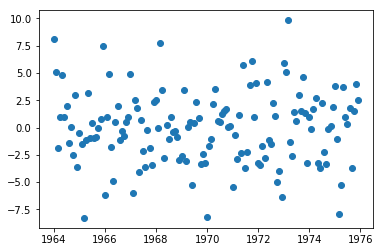

In [27]:
# Plot residuals
plt.plot(dubuque['Month'], model.resid, 'o')

We can also plot the Pearson (standardized) residuals, which have been normalized to have unit variance.

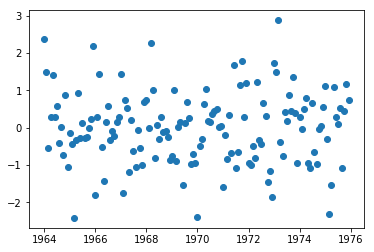

In [28]:
# Plot standardized residuals
plt.plot(dubuque['Month'], model.resid_pearson, 'o')

### Exhibit 3.7: Residuals versus Fitted Values for Temperature Series with Seasonal Means Model

In [29]:
# Get Pearson (standardized) residuals
residuals = model.resid_pearson

# Get predictions
predictions = model.predict()

Below is a plot of the standardized (Pearson) residuals vs. the fitted values.

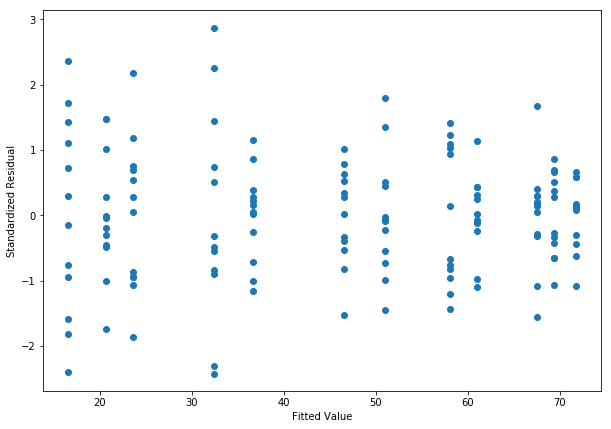

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(predictions, residuals, 'o')
plt.xlabel('Fitted Value')
plt.ylabel('Standardized Residual')

Next, we will examine the residuals and test for independence.

### Exhibit 3.8: Histogram of Standardized Residuals for Temperature Series with Seasonal Means Model

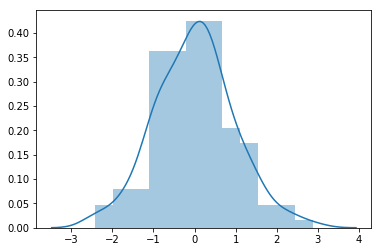

In [31]:
sns.distplot(residuals)

### Exhibit 3.9: Normal Scores Plot for Temperature Series with Seasnal Means Model

Nest, we will plot a "normal scores" (Q-Q) plot of the standardized residuals against their "normal scores"/theoretical quantiles (assuming they follow a normal distribution).

In [32]:
from scipy.stats import probplot

The normal probability plot below shows that the distribution of residuals is almost perfectly normal, with a few deviations at the tails.

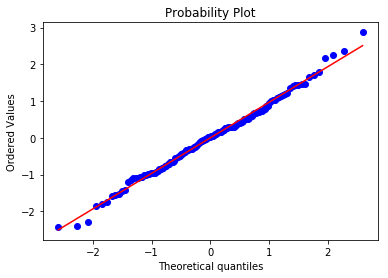

In [33]:
p = probplot(residuals, dist='norm', plot=plt)

#### Manual Normal Probability Plot

For my own edification, I am going to try to reproduce the above figure using the explanation of normal probability plots on Wikipedia: https://en.wikipedia.org/wiki/Normal_probability_plot.

According to Wikipedia, a normal probability plot is generated by first sorting your data from highest to lowest, then for i = 1 to n, computing the z-score of each value, then computing its corresponding "rankit," which is defined as follows:

$$z_i = \Phi^{-1}(\frac{i - a}{n + 1 - 2a})$$

where $a = \frac{3}{8}$ for $n \le 10$ and $a = \frac{1}{2}$ for $n > 10$. (Note: This is the rankit function that R uses and that Wikipedia mentions; other software might be slightly different)

In [34]:
from scipy.stats import norm

def rankit(i, n):
    if n <= 10:
        a = 3/8
    else:
        a = 1/2
        
    # Use norm.ppf() to get the inverse quantile
    z = norm.ppf((i - a)/(n + 1 - 2*a))
    
    return z

In [35]:
# Sort the residuals
ordered_residuals = residuals.copy()
ordered_residuals.sort()

In [36]:
# Compute z scores
z_observed = (ordered_residuals - ordered_residuals.mean())/ordered_residuals.std()

In [37]:
# Compute the theoretical quantiles
z_theoretical = [rankit(i=i, n=len(ordered_residuals)) for i in range(len(ordered_residuals))]

Now, we will plot our manual normal probability plot below. We can see that it looks almost exactly the same as the one above. SciPy probably has a slightly different means of computing the rankit function.

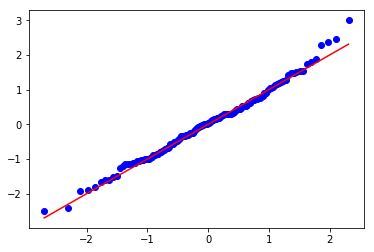

In [38]:
plt.plot(z_theoretical, z_observed, 'bo')
plt.plot(z_theoretical, z_theoretical, 'r-')

### Exhibit 3.10: Runs Test for Temperature Series with Seasonal Means Model

We will test the randomness (indepdence) of the reaiduals via the runs test, which examines at the residuals in a sequence and looks for patterns. Patterns occur when the residuals are not independent/random, so if an abnormal number of patterns is found, then the residuals are not independent (because the model did not capture the actual trend and made some systematic errors).

In [42]:
# Load the one-sample runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

We get a p-value of about 0.187, very close to what is seen on p. 44 in the book. Thus, we do not have enough evidence to reject the null hypothesis that the residuals are random.

In [44]:
z, p = runstest_1samp(residuals)
print('Runs Test (Z-Score):', z)
print('Runs Test (p-value):', p)

Runs Test (Z-Score): -1.3194201625
Runs Test (p-value): 0.187028684795
